# data analysis and wrangling
Import pandas and numpy libraries for data handling

In [83]:
import pandas as pd
import numpy as np 
import random as rnd

# visualization
import matplotlib pyplot to plot figures

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#machine learning

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Import Training and test data set
Import dataset to dataframe using Panda library. Both data set and training data set is combined to perform same operations over two data sets

In [86]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
combine = [train_df, test_df]

In [87]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Analysing the data features along with results column
Categorical Feature: Survived, Sex, and Embarked, Ordinal: Pclass 
Numerical Feature: Continuous: Age,Fare Discrete: SibSp,Parch 
Mixed Data Type: Ticket and Cabin Alpnumeric

In [88]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [89]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
train_df.info()
print ('----------------------------------------------')
test_df.info()
print('_______________________________________________')
train_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 no

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Find feature with error and typos 
Cabin, Age and Cabin have incomplete samples 
Seven features are integer while five features are string 

## Find correlation between age group and survival result

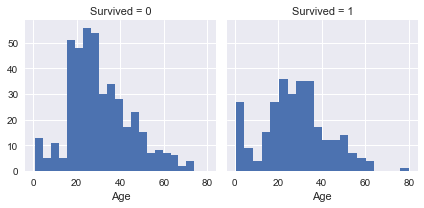

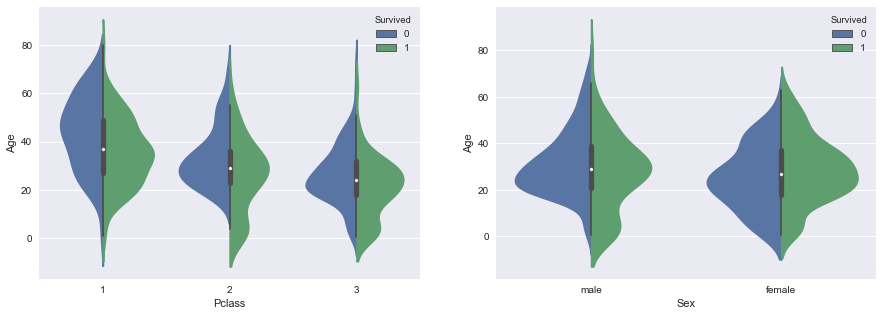

In [91]:
g=sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

fig, (axis1, axis2)= plt.subplots(1,2,figsize=(15,5))
sns.violinplot('Pclass','Age',hue='Survived',data=train_df,split=True,ax=axis1)
sns.violinplot('Sex','Age',hue='Survived',data=train_df,split=True,ax=axis2)

## Find correlation between passenger class and survival result

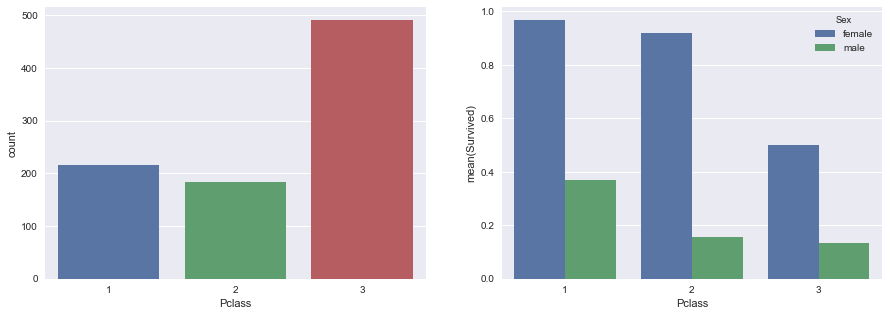

In [92]:
pd.crosstab(train_df.Pclass,train_df.Survived,margins=True).style.background_gradient(cmap='summer_r')
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Pclass', data=train_df,ax=axis1)
pclass_perc=train_df[['Pclass','Survived','Sex']].groupby(['Pclass','Sex'],as_index=False).mean()
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=pclass_perc,ax=axis2)


From above chart, it's observed that pClass=1  has higher chances of survival especially for female

## Finding coorelation between Sex and Embarking place with survival rate

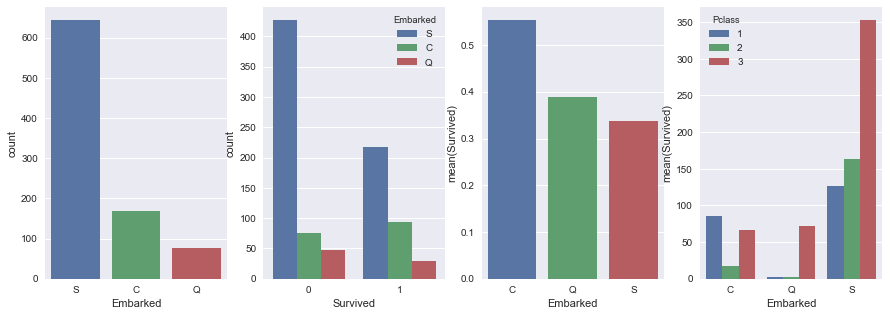

In [93]:
fig, (axis1,axis2,axis3,axis4) = plt.subplots(1,4,figsize=(15,5))
sns.countplot(x='Embarked', data=train_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=train_df, ax=axis2)

embark_perc = train_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
embark_perc
sns.barplot(x=embark_perc.Embarked, y=embark_perc.Survived,ax=axis3)

embark_class=train_df[['Embarked','Pclass','Survived']].groupby(['Embarked','Pclass'],as_index=False).count()
sns.barplot(x='Embarked', y='Survived',hue='Pclass',data=embark_class,ax=axis4)

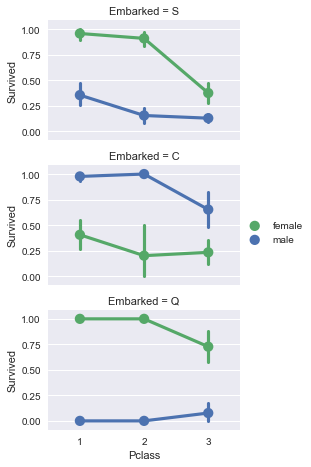

In [94]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

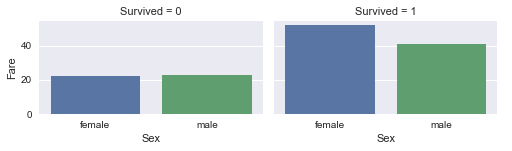

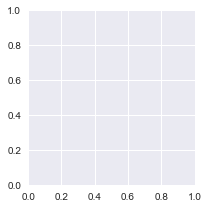

In [95]:
grid = sns.FacetGrid(train_df, col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', palette='deep',ci=None)
grid.add_legend()

grid = sns.FacetGrid(train_df, )

###### Female survival rate is higher than male

In [96]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [97]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Cleaver, Miss. Alice",male,347082,G6,S
freq,1,577,7,4,644


As Ticket field is quite random and have many unique values, it's better idea to drop this field.
As most of the cabin field is empty/missing, moreover cabin is shared by one or more people, Cabin field is also dropped from fruther analysis.

In [98]:
print("Before", train_df.shape, test_df.shape)
train_df = train_df.drop(['Ticket','Cabin'],axis=1)
test_df = test_df.drop(['Ticket','Cabin'],axis=1)
combine =[train_df, test_df]
train_df.shape, test_df.shape

print("after", train_df.shape, test_df.shape)

Before (891, 12) (418, 11)
after (891, 10) (418, 9)


Field Name is unique to itself and has quite minimum relations to survived field. The initials from Name can be extracted which might be taken as one of the features for further data analysis.

In [99]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [100]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [101]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [102]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [103]:
train_df = train_df.drop(['Name','PassengerId'],axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape



((891, 9), (418, 9))

In [104]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({"male" : 0,"female" :1}).astype(int)

train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [105]:
train_df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [106]:
freq_port = train_df.Embarked.mode()[0]
freq_port

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    dataset['Embarked']= dataset['Embarked'].map({"C":2,"Q":1,"S":0}).astype(int)
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,2,3
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,3
4,0,3,0,35.0,0,0,8.0500,0,1


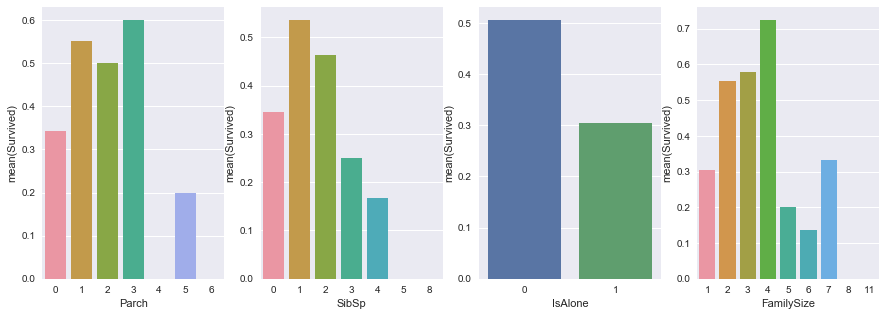

In [107]:
fig, (axis1,axis2,axis3,axis4) = plt.subplots(1,4,figsize=(15,5))
Parch_perc= train_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean()
sns.barplot(x= 'Parch',y='Survived',data=Parch_perc,ax=axis1)

SibSp_perc= train_df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean()
sns.barplot(x= 'SibSp',y='Survived',data=SibSp_perc,ax=axis2)

Alone_data= train_df
Alone_data['IsAlone'] = 0
Alone_data['FamilySize'] = Alone_data['SibSp']+Alone_data['Parch']+1

Alone_data.loc[(Alone_data['SibSp']+Alone_data['Parch'] == 0), 'IsAlone'] =1

Alone_perc= Alone_data[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean()
sns.barplot(x= 'IsAlone',y='Survived',data=Alone_perc,ax=axis3)

Family_perc= Alone_data[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean()
sns.barplot(x= 'FamilySize',y='Survived',data=Family_perc,ax=axis4)

In [108]:
for dataset in combine:
    dataset['FamilySize']=(dataset['SibSp']+dataset['Parch']+1).astype(int)

for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    


In [109]:
train_df = train_df.drop(['Parch','SibSp'],axis=1)
test_df = test_df.drop(['Parch','SibSp'],axis=1)

train_df.shape, test_df.shape
combine = [train_df,test_df]


In [110]:
train_df['FareBand'] = pd.qcut(train_df['Fare'],4)
train_df[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand')

,FareBand,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081


In [111]:
train_df['Fare'].fillna(train_df['Fare'].dropna().median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91,'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454),'Fare']=1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31),'Fare']=2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 512.329),'Fare'] =3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df = train_df.drop(['FareBand'],axis=1)
combine = [train_df,test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FamilySize
0,0,3,0,22.0,0,0,1,0,2
1,1,1,1,38.0,3,2,3,0,2
2,1,3,1,26.0,1,0,2,1,1
3,1,1,1,35.0,3,0,3,0,2
4,0,3,0,35.0,1,0,1,1,1


In [112]:
guess_ages = np.zeros((2,3),dtype=np.int)
guess_ages

array([[0, 0, 0],
       [0, 0, 0]])

In [113]:
for dataset in combine:
    for i in range(2):
        for j in range(3):
            guess_ages[i,j] = dataset.loc[(dataset['Sex']==i) & (dataset['Pclass']==j+1),'Age'].dropna().median()

for dataset in combine:
    for i in range(2):
        for j in range(3):
            dataset.loc[(dataset['Age'].isnull()) & (dataset['Sex']==i) & (dataset['Pclass']==j+1),'Age'] = guess_ages[i,j].astype(int)
    dataset['Age'] = dataset['Age'].astype(int)

In [114]:
train_df['AgeBand'] = pd.qcut(train_df['Age'],8)
train_df[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand')

,AgeBand,Survived
0,"[0, 17]",0.539823
1,"(17, 22]",0.387500
2,"(22, 24]",0.216783
3,"(24, 26]",0.292683
4,"(26, 30]",0.376238
5,"(30, 37]",0.460870
6,"(37, 45]",0.401709
7,"(45, 80]",0.376238


In [115]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FamilySize,AgeBand
0,0,3,0,22,0,0,1,0,2,"(17, 22]"
1,1,1,1,38,3,2,3,0,2,"(37, 45]"
2,1,3,1,26,1,0,2,1,1,"(24, 26]"
3,1,1,1,35,3,0,3,0,2,"(30, 37]"
4,0,3,0,35,1,0,1,1,1,"(30, 37]"


In [116]:
for dataset in combine:
    dataset.loc[(dataset['Age'] > 0) & (dataset['Age']<=16),'Age'] = 1
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age']<=32),'Age'] = 2
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age']<=48),'Age'] = 3
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age']<=64),'Age'] = 4
    dataset.loc[(dataset['Age'] > 64) ,'Age'] = 5

train_df = train_df.drop('AgeBand',axis=1)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FamilySize
0,0,3,0,2,0,0,1,0,2
1,1,1,1,3,3,2,3,0,2
2,1,3,1,2,1,0,2,1,1
3,1,1,1,3,3,0,3,0,2
4,0,3,0,3,1,0,1,1,1


In [117]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

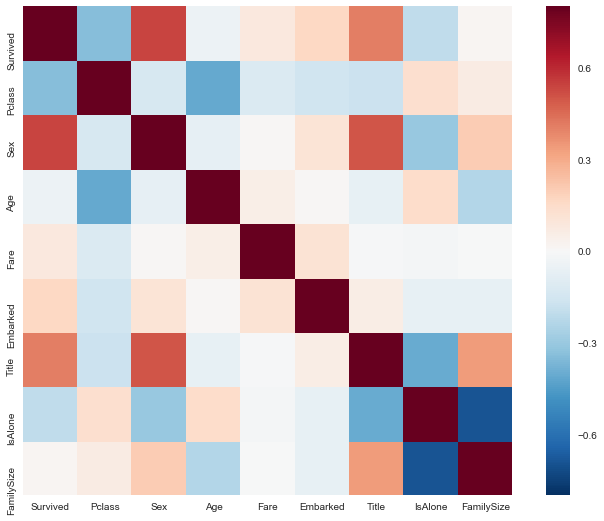

In [118]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [119]:
train_df.head()
train_df['Pclass'] = train_df['Pclass'].astype(str)

In [120]:
test_df.head()
train_df['Pclass'] = train_df['Pclass'].astype(str)

In [121]:
#train_df = train_df.drop('Embarked',axis=1)
#test_df = test_df.drop('Embarked',axis=1)

#combine = [train_df,test_df]

In [122]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

88.659999999999997

In [123]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)